In [1]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Activation,Flatten,Dropout,Input
from keras.callbacks import ModelCheckpoint
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
X=np.load('data.npy')
Y=np.load('target.npy')

In [3]:
print(X.shape,Y.shape)

(4618, 96, 96, 3) (4618, 2)


In [4]:
model=Sequential()
model.add(Input(shape=(96,96,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0

In [6]:
model.compile(loss=['categorical_crossentropy'],optimizer='adam',metrics=['accuracy'])

In [7]:
checkpoint = ModelCheckpoint('best_model',monitor='val_accuracy',verbose=1,save_best_only=True,mode='auto')
history=model.fit(X,Y,epochs=20,callbacks=[checkpoint],batch_size=20,shuffle=True,validation_split=0.1)

Epoch 1/20
208/208 [==============================] - ETA: 0s - loss: 2.1970 - accuracy: 0.8963
Epoch 00001: val_accuracy improved from -inf to 0.84199, saving model to best_model
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: best_model\assets
208/208 [==============================] - 118s 568ms/step - loss: 2.1970 - accuracy: 0.8963 - val_loss: 0.4732 - val_accuracy: 0.8420
Epoch 2/20
208/208 [==============================] - ETA: 0s - loss: 0.1207 - accuracy: 0.9622
Epoch 00002: val_accuracy improved from 0.84199 to 0.88095, saving model to best_model
INFO:tensorflow:Assets written to: best_model\assets
208/208 [==============================] - 114s 548ms/step - loss: 0.1207 - accuracy: 0.9622 - val_loss: 0.3066 - val_accuracy: 0.8810
Epoch 3/20
208/208 [=======

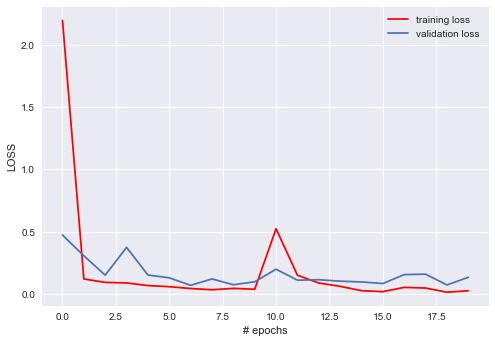

In [8]:
plt.style.use("seaborn")
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('LOSS')
plt.legend()
plt.show()

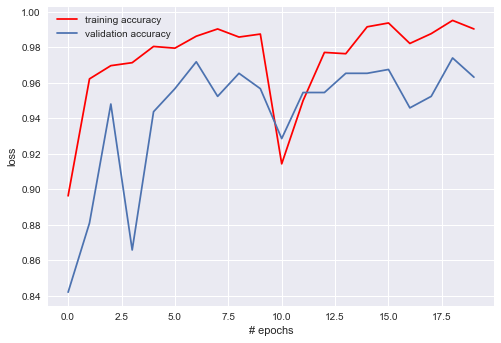

In [9]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [41]:
results = model.evaluate(X_test,Y_test)

15/15 [==============================] - 2s 119ms/step - loss: 0.2354 - accuracy: 0.9567


In [42]:
print("Final Loss and Accuracy Respectively on test data->",results)

Final Loss and Accuracy Respectively on test data-> [0.23537887632846832, 0.9567099809646606]


In [43]:
model.save('./final_model')

INFO:tensorflow:Assets written to: ./final_model\assets


In [4]:
from keras.models import load_model

In [6]:
test_model = load_model("./final_model/")